In [1]:
#La base de este programa está en la tarea 5 y 6 subidas la semana pasada. De hecho, esta estaba en ese programa.
function simpson(a,b)
    m=(b-a)/2
    A=(m/3)*(f(a)+f(b)+(4*f(m)))
    return A
    
end

simpson (generic function with 1 method)

In [2]:
f(x)=(3/(4-x))

f (generic function with 1 method)

In [3]:
simpson(0,2)

2.083333333333333

In [4]:
x=linspace(0,2*pi,10)

0.0:0.6981317007977318:6.283185307179586

Tarea 7.2 
Crear el método del polinomio de lagrange.
Hice pruebas para los siguientes códigos.
conjuntoy me da la imagen del primer conjunto x; ie si f(x)=cos conjuntoy(x,f) me da cada elemento de x evaluado en f
denominador(x) me sirve para calcular los denominadores de todas las L del polinomio de lagrande.
numerador(x) aca es donde me entraron dudas; lo programé hasta 10 pero no me salió la prueba, entonces fui bajando ese número e hice la prueba con algunos.
iter me da los valores de los coeficientes del polinomio de lagrange
y la funcion polinomio ya me evalua lo que pide y grafica.

In [5]:
function conjuntoy(x,f)
    y=[]
    Y=f(x)
    push!(y,Y)
end

conjuntoy (generic function with 1 method)

In [6]:
y=conjuntoy.(x,cos)

10-element Array{Array{Any,1},1}:
 Any[1.0]      
 Any[0.766044] 
 Any[0.173648] 
 Any[-0.5]     
 Any[-0.939693]
 Any[-0.939693]
 Any[-0.5]     
 Any[0.173648] 
 Any[0.766044] 
 Any[1.0]      

In [33]:
function denominador(x)
    N=length(x)
    s=N*(N-1)
    A=[] #A es un arreglo vacio donde voy a guardar los valores de las restas
    D=[] #Es un arreglo vacio donde voy a guardar los valores de los denominadores
    for i in 1:N #aqui es para ir variando los x[i]
        d=1
        for j in 1:N #aqui es para comparar y que no haya i=j
            if j!=i #aqui hago esa comparación
                a=x[i]-x[j] #sabemos que la fórmula para el polinomio de lagrange de x[i], multiplica la resta de los elementos
                #x[i]-x[j] variando j y dejando fijo i. Por lo tanto para x[i] habrá n-1 valores de x[i]-x[j] donde n es
                #la longitud del vector x
                #println("(",x[i]," ",x[j],")  ",a)
                push!(A,a) #Voy a guardar los valores de estas restas, pero se van a guardar la de todos los valores x[i]
                #es decir el vector A tendra N*N-1 elementos, N por la evaluacion de todas las x[i] y n-1 porque cada x[i] tiene 
                #n-1 restas.
            end
            #println(A)
        end
    end
    for l in 1:N
        d=1
        cotinf=((N-1)*(l-1))+1
        cotsup=((N-1)*l)
        #println(A[cotinf],"  ",A[cotsup])
        for k in 1:s
            if cotinf<=k && k<=cotsup
                d=d*A[k]
            end
        end
        push!(D,d)
        #println(D)
    end
    D
end

denominador (generic function with 1 method)

In [82]:
function numeradorpara3(r)
    A=zeros(3,3)
    N=length(r)
    K1=[]
    K2=[]
    K3=[]
    for i in 1:3
        c=[]
        for j in 1:3
            if j!=i
                #println("para esta ",r[i]," las validas son ",r[j])
                push!(c,r[j])
            end
        end
        #println(c)
        #Para los numeradores, se obtendran polinomios de grado N-1. 
            k1=(-c[1])*(-c[2]) #coefciente para x a la o
        push!(K1,k1)
            k2=(-c[1])+(-c[2]) #coeficiente para x a la 1
        push!(K2,k2)
            k3=1 #coeficiente para x al cuadrado
        push!(K3,k3)
    end
A[1,1]=K3[1]
    A[2,1]=K3[2]
    A[3,1]=K3[3]
    A[1,2]=K2[1]
    A[2,2]=K2[2]
    A[3,2]=K2[3]
    A[1,3]=K1[1]
    A[2,3]=K1[2]
    A[3,3]=K1[3]
    A
end

numeradorpara3 (generic function with 1 method)

In [83]:
u=[0,3,6]
    
    

3-element Array{Int64,1}:
 0
 3
 6

In [84]:
A=numeradorpara3(u)

3×3 Array{Float64,2}:
 1.0  -9.0  18.0
 1.0  -6.0   0.0
 1.0  -3.0   0.0

In [85]:
denominador(u)

3-element Array{Any,1}:
 18
 -9
 18

In [86]:
println(A)

[1.0 -9.0 18.0; 1.0 -6.0 0.0; 1.0 -3.0 0.0]


In [117]:
function iterpolacion(x,y)
    D=denominador(x)
    A=numeradorpara3(x)
    cociente=[]
    N0=[]
    N1=[]
    N2=[]
    for i in 1:3
        coc=y[i]/D[i] #esto es para calcular los cocientes de y/(xi-xj) con i distinto de j
        push!(cociente,coc)
    end
    #println(cociente)
    for j in 1:3 #aca multiplico estos cocientes por el polinomio obtenido de (x-xj)(x-xk) con j y k en el conjunto x y distintos de i
        n2=cociente[j]*A[j,1]
        push!(N2,n2)
    n1=cociente[j]*A[j,2]
    push!(N1,n1)
       n0=cociente[j]*A[j,3]
        push!(N0,n0)
    end
    a=sum(N2) #ya realiza la suma de los x2 x y x^0
    b=sum(N1)
    c=sum(N0)
    println("el coeficiente para x cuadrada es ",a," para x es ",b," y la constantes es ",c)
    println("por lo cual la función es ",a,"x^2 + ",b,"x + ",c)
end

iterpolacion (generic function with 1 method)

In [118]:
v=[7,7,6]

3-element Array{Int64,1}:
 7
 7
 6

In [119]:
iterpolacion(u,v)

el coeficiente para x cuadrada es -0.05555555555555558 para x es 0.16666666666666696 y la constantes es 7.0
por lo cual la función es -0.05555555555555558x^2 + 0.16666666666666696x + 7.0


In [123]:
function polinomio(x,y,f)
    scatter(x,y,color="red")
    scatter(x,f,color="green")
end

polinomio (generic function with 2 methods)

In [124]:
using PyPlot

In [125]:
r=[0,pi,2*pi]

3-element Array{Float64,1}:
 0.0    
 3.14159
 6.28319

In [126]:
s=conjuntoy.(r,cos)

3-element Array{Array{Any,1},1}:
 Any[1.0] 
 Any[-1.0]
 Any[1.0] 

In [127]:
iterpolacion(r,s)

el coeficiente para x cuadrada es [0.202642] para x es [-1.27324] y la constantes es [1.0]
por lo cual la función es [0.202642]x^2 + [-1.27324]x + [1.0]


In [128]:
polinomio1(x)=(0.202642*x^2)-(1.27324*x)+1

polinomio1 (generic function with 1 method)

In [131]:
p1=polinomio1.(r)

3-element Array{Float64,1}:
  1.0     
 -1.00001 
  0.999983

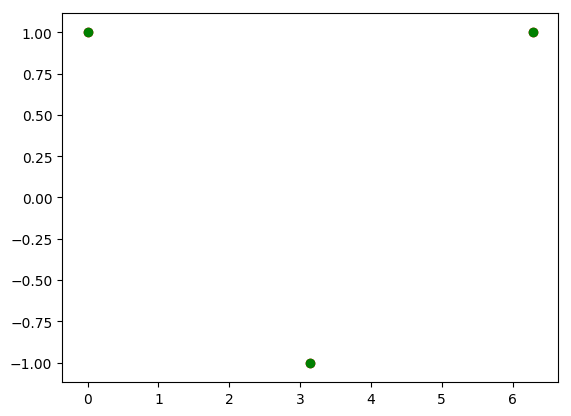

PyObject <matplotlib.collections.PathCollection object at 0x7f29835d4510>

In [132]:
polinomio(r,s,p1)

In [135]:
coscuadrado(x)=(cos(x)*cos(x))

coscuadrado (generic function with 1 method)

In [138]:
s1=conjuntoy.(r,coscuadrado)

3-element Array{Array{Any,1},1}:
 Any[1.0]
 Any[1.0]
 Any[1.0]

In [139]:
iterpolacion(r,s1)

el coeficiente para x cuadrada es [0.0] para x es [2.77556e-17] y la constantes es [1.0]
por lo cual la función es [0.0]x^2 + [2.77556e-17]x + [1.0]


In [144]:
poli2(x)=((2.7755e-17)*x)+1

poli2 (generic function with 1 method)

In [145]:
p2=poli2.(r)

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

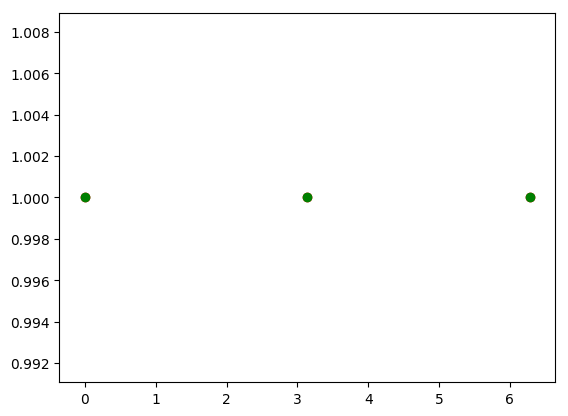

PyObject <matplotlib.collections.PathCollection object at 0x7f29834c8610>

In [146]:
polinomio(r,s1,p2)

Aquí pongo el método para objetener los numeradores para N=10

In [147]:
function numerador10(r)
    N=length(r)
    for i in 1:N
        k=[]
        c=[]
        for j in 1:N
            if j!=i
                #println("para esta ",r[i]," las validas son ",r[j])
                push!(c,r[j])
            end
        end
        #Para los numeradores, se obtendran polinomios de grado N-1. 
        if N==3
            k[1]=c[1]*c[2]
            k[2]=c[1]+c[2]
            k[3]=1
        end
        if N==4
            k[1]=c[1]*c[2]*c[3]
            k[2]=(c[3]*(c[1]+c[2]))+(c[1]*c[2])
            k[3]=c[1]+c[2]+c[3]
            k[4]=1
        end
        if N==5
            k[1]=c[4]*c[1]*c[2]*c[3]
            k[2]=(c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2])))
            k[3]=((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3]))
            k[4]=c[1]+c[2]+c[3]+c[4]
            k[5]=1
        end
        if N==6
            k[1]=c[5]*c[4]*c[1]*c[2]*c[3]
            k[2]=((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2])))
            k[3]=((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3]))))
            k[4]=(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4]))
            k[5]=c[4]+c[1]+c[2]+c[3]+c[5]
            k[6]=1
        end
        if N==7
            k[1]=c[5]*c[4]*c[1]*c[2]*c[3]*c[6]
            k[2]=(c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2])))))
            k[3]=(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3]))))))
            k[4]=(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4]))))
            k[5]=((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5]))
            k[6]=c[4]+c[1]+c[2]+c[3]+c[5]+c[6]
            k[7]=1
        end
        if N==8
            k[1]=c[7]*c[5]*c[4]*c[1]*c[2]*c[3]*c[6]
            k[2]=(c[5]*c[4]*c[1]*c[2]*c[3]*c[6])+(c[7]*(c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))))
            k[3]=((c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))))+(c[7]*((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3]))))))))
            k[4]=((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))))+(c[7]*((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4]))))))
            k[5]=((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))))+(c[7]*(((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5]))))
            k[6]=(((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5])))+(c[7]*(c[4]+c[1]+c[2]+c[3]+c[5]+c[6]))
            k[7]=c[4]+c[1]+c[2]+c[3]+c[5]+c[6]+c[7]
            k[8]=1
        end
        if N==9
        k[1]=c[7]*c[5]*c[4]*c[1]*c[2]*c[3]*c[6]*c[8]
            k[2]=(c[7]*c[5]*c[4]*c[1]*c[2]*c[3]*c[6])+(c[8]*((c[5]*c[4]*c[1]*c[2]*c[3]*c[6])+(c[7]*(c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))))))
            k[3]=((c[5]*c[4]*c[1]*c[2]*c[3]*c[6])+(c[7]*(c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2])))))))+(c[8]*(((c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))))+(c[7]*((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3]))))))))))
            k[4]=(((c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))))+(c[7]*((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))))))+(c[8]*(((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))))+(c[7]*((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4]))))))))
            k[5]=(((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))))+(c[7]*((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))))))+(c[8]*(((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))))+(c[7]*(((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5]))))))
            k[6]=(((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))))+(c[7]*(((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5])))))+(c[8]*((((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5])))+(c[7]*(c[4]+c[1]+c[2]+c[3]+c[5]+c[6]))))
            k[7]=((((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5])))+(c[7]*(c[4]+c[1]+c[2]+c[3]+c[5]+c[6])))+(c[8]*(c[4]+c[1]+c[2]+c[3]+c[5]+c[6]+c[7]))
            k[8]=c[4]+c[1]+c[2]+c[3]+c[5]+c[6]+c[7]+c[8]
            k[9]=1
        end
        if N==10
            k[1]=c[7]*c[5]*c[4]*c[1]*c[2]*c[3]*c[6]*c[8]*c[9]
            k[2]=(c[7]*c[5]*c[4]*c[1]*c[2]*c[3]*c[6]*c[8])+(c[9]*((c[7]*c[5]*c[4]*c[1]*c[2]*c[3]*c[6])+(c[8]*((c[5]*c[4]*c[1]*c[2]*c[3]*c[6])+(c[7]*(c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))))))))
            k[3]=((c[7]*c[5]*c[4]*c[1]*c[2]*c[3]*c[6])+(c[8]*((c[5]*c[4]*c[1]*c[2]*c[3]*c[6])+(c[7]*(c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2])))))))))+(c[9]*(((c[5]*c[4]*c[1]*c[2]*c[3]*c[6])+(c[7]*(c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2])))))))+(c[8]*(((c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))))+(c[7]*((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3]))))))))))))
            k[4]=(((c[5]*c[4]*c[1]*c[2]*c[3]*c[6])+(c[7]*(c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2])))))))+(c[8]*(((c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))))+(c[7]*((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))))))))+(c[9]*((((c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))))+(c[7]*((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))))))+(c[8]*(((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))))+(c[7]*((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4]))))))))))
            k[5]=((((c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))))+(c[7]*((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))))))+(c[8]*(((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))))+(c[7]*((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))))))))+(c[9]*((((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))))+(c[7]*((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))))))+(c[8]*(((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))))+(c[7]*(((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5]))))))))
            k[6]=((((((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))))+(c[7]*((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))))))+(c[8]*(((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))))+(c[7]*(((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5])))))))+(c[9]*((((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))))+(c[7]*(((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5])))))+(c[8]*((((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5])))+(c[7]*(c[4]+c[1]+c[2]+c[3]+c[5]+c[6]))))))
            k[7]=((((((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))))+(c[7]*(((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5])))))+(c[8]*((((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5])))+(c[7]*(c[4]+c[1]+c[2]+c[3]+c[5]+c[6])))))+(c[9]*(((((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5])))+(c[7]*(c[4]+c[1]+c[2]+c[3]+c[5]+c[6])))+(c[8]*(c[4]+c[1]+c[2]+c[3]+c[5]+c[6]+c[7]))))
            k[8]=(((((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5])))+(c[7]*(c[4]+c[1]+c[2]+c[3]+c[5]+c[6])))+(c[8]*(c[4]+c[1]+c[2]+c[3]+c[5]+c[6]+c[7])))+(c[9]*(c[4]+c[1]+c[2]+c[3]+c[5]+c[6]+c[7]+c[8]))
            k[9]=c[4]+c[1]+c[2]+c[3]+c[5]+c[6]+c[7]+c[8]+c[9]
            k[10]=1
        end
        println(k)
    end
end

numerador10 (generic function with 1 method)

In [160]:
function numeradorpara7(r)
    A=zeros(7,7)
    N=length(r)
    K1=[]
    K2=[]
    K3=[]
    K4=[]
    K5=[]
    K6=[]
    K7=[]
    for i in 1:7
        c=[]
        for j in 1:7
            if j!=i
                #println("para esta ",r[i]," las validas son ",r[j])
                push!(c,(-r[j]))
            end
        end
        println(c)
        #Para los numeradores, se obtendran polinomios de grado N-1. 
            k1=c[5]*c[4]*c[1]*c[2]*c[3]*c[6] #coefciente para x a la o
        push!(K1,k1)
            k2=(c[5]*c[4]*c[1]*c[2]*c[3])+(c[6]*(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))) #coeficiente para x a la 1
        push!(K2,k2)
            k3=(((c[4]*c[1]*c[2]*c[3])*(c[5]*(c[1]*c[2]*c[3])))+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[6]*(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))) #coeficiente para x al cuadrado
        push!(K3,k3)
        k4=(((c[1]*c[2]*c[3])+(c[4]*((c[3]*(c[1]+c[2]))+(c[1]*c[2]))))+(c[5]*(((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))))+(c[6]*((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4]))))
        push!(K4,k4)
            k5=((((c[3]*(c[1]+c[2]))+(c[1]*c[2]))+(c[4]*(c[1]+c[2]+c[3])))+(c[5]*(c[1]+c[2]+c[3]+c[4])))+(c[6]*(c[4]+c[1]+c[2]+c[3]+c[5]))
        push!(K5,k5)
            k6=c[4]+c[1]+c[2]+c[3]+c[5]+c[6]
        push!(K6,k6)
            k7=1
        push!(K7,k7)
    end
for h in 1:7
        for u in 1:7
            if u==1
                S=K7
            end
            if u==2
                S=K6
            end
            if u==3
                S=K5
            end
            if u==4
                S=K4
            end
            if u==5
                S=K3
            end
            if u==6
                S=K2
            end
            if u==7
                S=K1
            end
            A[h,u]=S[h]
        end
    end
    println(A)
end

numeradorpara7 (generic function with 1 method)

In [161]:
rst=[0,2,3,4,5,6,7]

7-element Array{Int64,1}:
 0
 2
 3
 4
 5
 6
 7

In [162]:
yrst=[10,-10,-4,0,5,20,-1]

7-element Array{Int64,1}:
  10
 -10
  -4
   0
   5
  20
  -1

Por ultimo, el ultimo ejercicio lo hice en la tarea 6 que esel comprobar los metodos de integracion con la integral exacta.